## This module about methods of ensamble: Boosting and Stacking

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

In [11]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [19]:
y = titanic['Survived']
X = titanic.drop(columns='Survived')
trees = [1] + list(range(10, 100, 10))

In [37]:
def evaluate(model):
    scoring = []
    for tree in trees:
        this_model = model(n_estimators=tree)
        score = cross_val_score(this_model, X, y, 
                                scoring='roc_auc', cv=3)
        scoring.append(score)
    return np.asmatrix(scoring)

In [38]:
boosts = [AdaBoostClassifier, GradientBoostingClassifier, XGBClassifier]

In [58]:
%%time
ada_scoring = evaluate(boosts[0])
ada_scoring

CPU times: user 1.61 s, sys: 9.83 ms, total: 1.62 s
Wall time: 1.62 s


matrix([[0.77164222, 0.78587863, 0.7430975 ],
        [0.79997124, 0.85557473, 0.86624005],
        [0.80560349, 0.85092513, 0.88447896],
        [0.79925223, 0.84766561, 0.88562937],
        [0.80236794, 0.84502924, 0.87553926],
        [0.80059438, 0.8420094 , 0.87553926],
        [0.80040265, 0.84112262, 0.88050043],
        [0.80136133, 0.84210526, 0.88203432],
        [0.80299108, 0.84385486, 0.87340619],
        [0.8038539 , 0.84450197, 0.87824753]])

In [59]:
%%time
gbc_scoring = evaluate(boosts[1])
gbc_scoring

CPU times: user 1.11 s, sys: 0 ns, total: 1.11 s
Wall time: 1.1 s


matrix([[0.81430352, 0.84991851, 0.87491612],
        [0.81763493, 0.87117726, 0.88677979],
        [0.83247052, 0.87364586, 0.88179465],
        [0.81703576, 0.8781996 , 0.8825616 ],
        [0.81777874, 0.87407727, 0.88186655],
        [0.81451922, 0.87117726, 0.88730707],
        [0.81375228, 0.8694037 , 0.88349631],
        [0.80998945, 0.86983511, 0.88117151],
        [0.80982169, 0.87141693, 0.87635414],
        [0.81341674, 0.87177644, 0.87501198]])

In [60]:
%%time
xgb_scroing = evaluate(boosts[2])
xgb_scroing

CPU times: user 27.3 s, sys: 138 ms, total: 27.5 s
Wall time: 3.7 s


matrix([[0.8108283 , 0.86564088, 0.87714505],
        [0.80967788, 0.89497651, 0.86614419],
        [0.81658039, 0.88625252, 0.86156648],
        [0.8127936 , 0.88191449, 0.8582111 ],
        [0.81324897, 0.87800786, 0.85694085],
        [0.81125971, 0.87865497, 0.85698878],
        [0.81056466, 0.87760042, 0.85646151],
        [0.81032499, 0.87386157, 0.86183012],
        [0.80816796, 0.8758748 , 0.85881028],
        [0.80792829, 0.87395743, 0.85665325]])

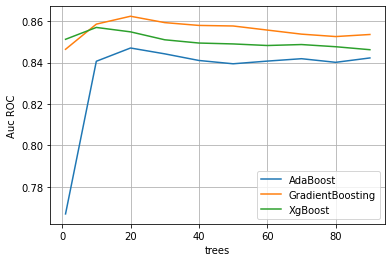

In [57]:
plt.plot(trees, ada_scoring.mean(axis=1), label='AdaBoost')
plt.plot(trees, gbc_scoring.mean(axis=1), label='GradientBoosting')
plt.plot(trees, xgb_scroing.mean(axis=1), label='XgBoost')
plt.grid(True)
plt.legend()
plt.xlabel('trees')
plt.ylabel('Auc ROC')
plt.show()